<a href="https://colab.research.google.com/github/MichelBMachado/MAC019/blob/main/MAC019_P1_E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 3 (30 pontos)

Sabendo que a força máxima d tração ou compressão nos membros é de 30 kN, determine o maior valor  da carga P  pode assumir para ser aplicada  nos nós  A e B.

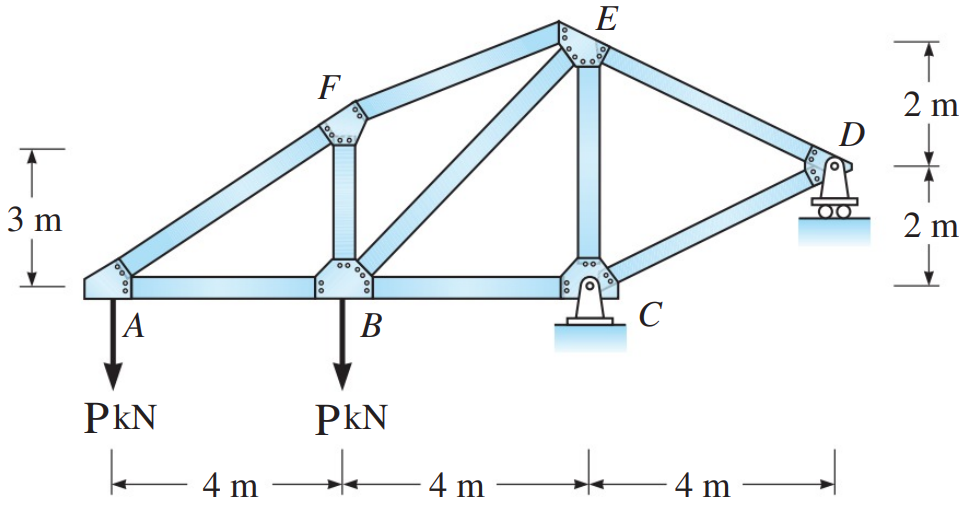

O primeiro passo para resolver este problema é montar um sistema de equações para as reações de apoio considerando as condições de equilibrio. Após a montagem do sistema, as reações de apoio em C e D devem ser obtidas em função de P.

De posse das reaçãoes de apoio, devem ser montados sistemas de equações para cada nó da estrutura levando em conta as condições de equilibrio. E então, um sistema maior de equações deve ser montado utilizando as equações de todos os nós.

Tal sistema de equações será resolvido através do SymPy objetivando determinar as forças em cada uma das barras em função de P. O próximo passo consiste em determinar a barra que sofre o maior esforço axial, isso é feito comparando o coeficiente que acompanha P. A barra com o maior coeficiente apresentará o maior esforço axial.

Sabendo que a máxima força axial admissivel em cada barra é de 30 kN e sabendo que a força em cada barra é uma função de P, basta igualar a força axial da barra que sofre o maior esforço ao valor da máxima força admissivel para determinar o módulo de P.





In [ ]:
# Instalando o pacote anastruct
!pip install anastruct

     |████████████████████████████████| 71kB 3.5MB/s 


In [ ]:
# Importanto os pacotes
import numpy as np
import matplotlib.pyplot as plt
from anastruct import SystemElements
import pandas as pd
import sympy as sp

In [ ]:
def structure_definition(nodes, elements, supports):
  
  # Transformação das barras em elementos de treliça
  for element in elements:
    ss.add_truss_element(location = [nodes[element[0]], nodes[element[1]]])

  # Aplicação dos suportes aos nós
  for support, components in supports.items():
    if (components[0] == 1 and components[1] == 1):
      ss.add_support_hinged(node_id = ss.find_node_id(nodes[support]))
    else:
      ss.add_support_roll(node_id = ss.find_node_id(nodes[support]))

In [ ]:
# Definição da força máxima admissivel em cada barra
max_element_force = 30 

# Definição dos nós
nodes = {'A':[0, 0], 'B':[4, 0], 'C':[8, 0], 'D':[12, 2], 'E':[8, 4], 'F':[4, 3]}

# Definição das barras
elements = [['A', 'B'], ['A', 'F'], ['B', 'C'], ['B', 'F'], ['B', 'E'], ['C', 'D'], ['C', 'E'], ['D', 'E'], ['E', 'F']]

# Definição dos apoios 
supports = {'C':[1, 1, 0], 'D':[0, 1, 0]}

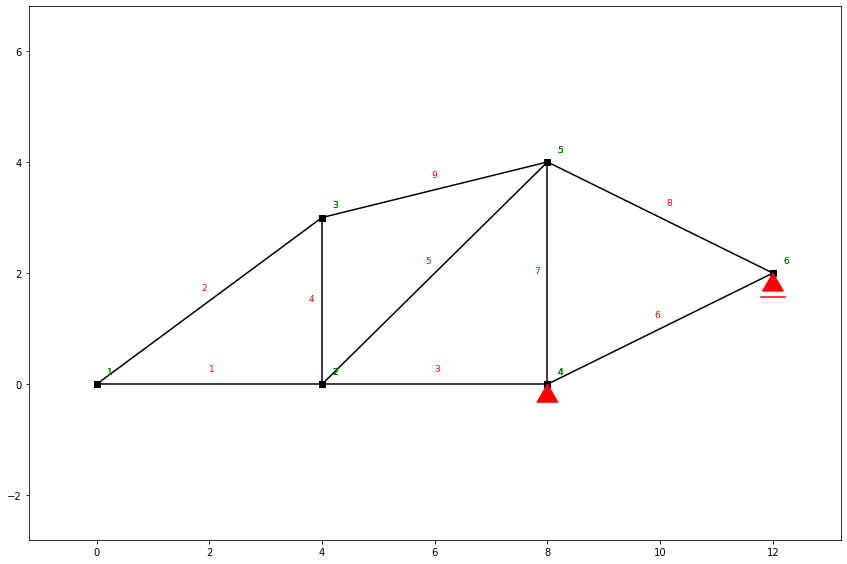

In [ ]:
# Instância do sistema estrutural
ss = SystemElements()

# Definição da estrutura
structure_definition(nodes, elements, supports)

# Exibição da estrutura
ss.show_structure(scale=0.6)

In [ ]:
def load_calculation(eq_3, eq_4, eq_7, eq_8, eq_9, eq_10, eq_11, eq_13, eq_14, max_element_force):
  
  # Resolve o sistema de forças
  Forces = sp.solve([eq_3, eq_4, eq_7, eq_8, eq_9, eq_10, eq_11, eq_13, eq_14], (F_1, F_2, F_3, F_4, F_5, F_6, F_7, F_8, F_9))

  # Obtem os coeficientes que multiplicam cada força
  Coefficients = {}
  for Force, Module in Forces.items():
    Coefficients[Force] = Module.coeff(P)

  # Determina qual barra esta sujeita ao maior esforço
  Max_Force = max(Coefficients, key = Coefficients.get)
  
  # Retorna o módulo de P
  return float(sp.solve(Forces[Max_Force] - max_element_force)[0])

In [ ]:
# Nessa seção a computação simbólica é utilizada visando determinar o módulo de P

# Variáveis simbólicas
P = sp.var('P')
C_y, C_x, D_y = sp.var('C_y, C_x, D_y')
F_1, F_2, F_3, F_4, F_5, F_6, F_7, F_8, F_9 = sp.var('F_1, F_2, F_3, F_4, F_5, F_6, F_7, F_8, F_9')

# Equacionamento das reações de apoio
eq_1 = C_y - D_y - 2*P
eq_2 = 12*P - 4*D_y

# Cálculo das reações de apoio 
reaction_forces = sp.solve([eq_1, eq_2], (C_y, D_y))
C_y = reaction_forces[C_y]
D_y = reaction_forces[D_y]

# Equacionamento do nó "A"
eq_3 = (3/5)*F_2 - P
eq_4 = F_1 - (4/5)*F_2 

# Equacionamento do nó "C"
eq_7 = C_y - F_7 - ((5**0.5)/5)*F_6
eq_8 = F_3 - (2*(5**0.5)/5)*F_6

# Equacionamento do nó "D"
eq_9 = ((5**0.5)/5)*F_8 + ((5**0.5)/5)*F_6 - D_y 
eq_10 = F_8 - F_6 

# Equacionamento do nó "E"
eq_11 = -((17**0.5)/17)*F_9 - ((2**0.5)/2)*F_5 + F_7 - ((5**0.5)/5)*F_8
eq_12 = -(4*(17**0.5)/17)*F_9 - ((2**0.5)/2)*F_5 + (2*(5**0.5)/5)*F_8

# Equacionamento do nó "F"
eq_13 = F_4 + ((17**0.5)/17)*F_9 - (3/2)*F_2
eq_14 = ((17**0.5)/17)*F_9 - (1/5)*F_2

# Determinação do módulo de P
F = load_calculation(eq_3, eq_4, eq_7, eq_8, eq_9, eq_10, eq_11, eq_13, eq_14, max_element_force)

# Apresentação do resultado 
print('O módulo da máxima carga admissivel para P =', F, 'kN')

O módulo da máxima carga admissivel para P = 8.571428571428571 kN


In [ ]:
def load_aplication(nodes, loads):
  
  # Aplicação das forças aos nós
  for load, components in loads.items():
    ss.point_load(node_id = ss.find_node_id(nodes[load]), Fx = components[0] , Fy = components[1])

In [ ]:
# Nessa seção são aplicados os carregamentos calculados visando verificar se nenhuma barra tem uma força superior a máxima admissivel

# Definição dos carregamentos
loads = {'A':[0, -F], 'B':[0, -F]}

# Aplicação das cargas na estrutura
load_aplication(nodes, loads)

# Resolução do problema
ss.solve()

# Obtenção dos esforços de cada barra
element_results = ss.get_element_results()
force = np.zeros((9, 2))
i = 0
for result in element_results:
  force[i, 0] = result['id']
  force[i, 1] = result['N']
  i = i + 1
    
# Exibição tabelada das forças em cada elemento
force = pd.DataFrame(force)
force

,0,1
0,1.0,-11.428571
1,2.0,14.285714
2,3.0,-25.714286
3,4.0,-5.714286
4,5.0,20.203051
5,6.0,-28.749445
6,7.0,-30.000000
7,8.0,28.749445
8,9.0,11.780302
